In [1]:
from spreg import OLS
import pysal as ps
import libpysal
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
regression_df = gpd.read_file('../raw_data/for_models/regression_gdf.shp')
clustering_df = gpd.read_file('../raw_data/for_models/cluster_gdf.shp')

In [51]:
regression_df

0      11501341
1       3701659
2       7601340
3       2500831
4      12601134
         ...   
531    12500927
532     3200204
533    10400941
534     8100101
535    11300616
Name: PLR_ID, Length: 536, dtype: int64

In [3]:
from sklearn.preprocessing import robust_scale
clustering_df.child_pov = robust_scale(clustering_df.child_pov)

In [ ]:
y_perm = regression_df['child_pov']
X_perm = regression_df.drop(columns=['PLR_ID','BZR_NAME','child_pov', 'HK_NZOrd','geometry'])

### Perform permutation
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
#fit model
model = LinearRegression().fit(X_perm,y_perm)
#Perform permutation
permutation_score = permutation_importance(model, X_perm,y_perm, n_repeats=100)
#Unstack results, put in df
importance_df = pd.DataFrame(np.vstack((X_perm.columns,permutation_score.importances_mean)).T)
importance_df.columns=['feature','feature importance']
#Order by importance
importance_df.sort_values(by='feature importance', ascending = False, inplace=True)
importance_df
#remove feature that have lower feature importance, run the validation score to test the reduced feature

In [ ]:
from sklearn.feature_selection import mutual_info_regression as MIR

In [ ]:
features_clust = [
    'mig_rate', 'public_tra', 'eating', 'culture', 'community', 'health_car', 'public_ser',
    'education', 'universiti', 'outdoor_fa', 'outdoor_le', 'night_life',
    'water', 'ave_rent', 'social_hou', 'dyn_ew', 'dyn_r_to_p', 'dyn_sales',
    'dyn_unempl', 'dyn_welfar', 'noise', 'air', 'green', 'bio',
    'other_sch', 'vocat_sch', 'primary_sc', 'Gymnasium', 'secon_sch',
    'priv_schoo', 'sp_nee_sch', 'kita', 'stations'
]

In [ ]:
mi_score_from_cluster = MIR(clustering_df[features_clust], clustering_df.child_pov)

In [ ]:
pd.DataFrame(mi_score_from_cluster, index=clustering_df[features_clust].columns).sort_values(by=0, ascending=False).head(20)

In [ ]:
features_reg = ['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'schools', 'universiti', 'kindergart',
       'outdoor_fa', 'outdoor_le', 'night_life', 'water', 'mig_rate',
       'ave_rent', 'social_hou',
       'public_hou', 'dyn_ew', 'dyn_sales',
       'dyn_unempl', 'noise', 'air', 'green', 'bio', 'vegpm20',
       'vegpm10', 'change', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations']

In [ ]:
mi_score_from_reg = MIR(regression_df[features_reg], regression_df.child_pov)

In [ ]:
f_reg_dyn_unempl = ['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'schools', 'universiti', 'kindergart',
       'outdoor_fa', 'outdoor_le', 'night_life', 'water', 'mig_rate',
       'ave_rent', 'social_hou', 'public_hou', 'dyn_ew', 'dyn_sales', 'noise', 'air', 'green', 'bio', 'vegpm20',
       'vegpm10', 'change', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations']

In [ ]:
pd.DataFrame(mi_score_from_reg, index=regression_df[features_reg].columns).sort_values(by=0, ascending=False)

In [ ]:
pd.DataFrame(MIR(regression_df[f_reg_dyn_unempl], regression_df.dyn_unempl), index=regression_df[f_reg_dyn_unempl].columns).sort_values(by=0, ascending=False)

In [10]:
clustering_df.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'BZR_NAME', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'B_age', 'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry', 'label'],
      dtype='object')

In [147]:
new_cluster_variables = [
    'eating', 'night_life', 'five_y_pls', 'mig_rate'
]

In [114]:
old_cluster_variables = []

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(clustering_df[infrastructure])

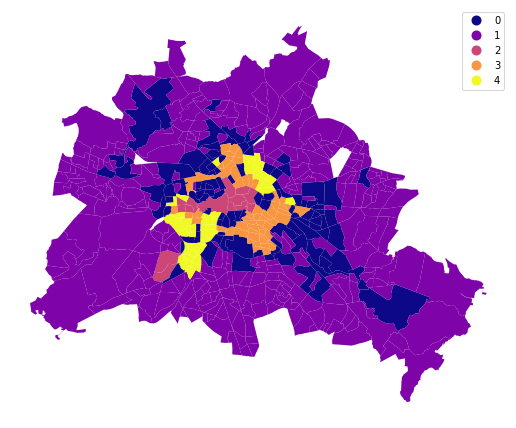

In [9]:
# Assign labels into a column
clustering_df["label"] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
clustering_df.plot(
    column="label", categorical=True, legend=True, linewidth=0, ax=ax, cmap='plasma'
)
# Remove axis
ax.set_axis_off()
plt.show()

Text(0.5, 0, 'k cluster number')

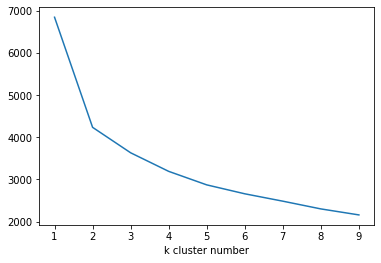

In [6]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(clustering_df[infrastructure])
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [12]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = clustering_df.groupby("label")[infrastructure].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

label,0,1,2,3,4
public_tra,0.424,-0.170,2.184,0.354,-0.035
eating,0.483,-0.129,3.224,2.186,1.655
culture,0.547,-0.061,3.057,2.453,1.007
community,0.657,-0.248,1.000,2.655,0.728
health_car,0.496,-0.243,0.800,1.096,1.972
public_ser,0.365,-0.324,1.357,0.798,0.774
education,0.954,0.182,1.643,1.491,4.611
universiti,0.734,0.262,6.429,0.965,1.444
outdoor_fa,0.899,-0.245,1.897,0.903,0.158
outdoor_le,0.703,0.065,0.107,0.366,-0.079


In [13]:
clustering_df.groupby("label").size()

label
0    109
1    302
2     14
3     57
4     54
dtype: int64

In [68]:
from sklearn.decomposition import KernelPCA

In [98]:
kpca = KernelPCA(kernel = 'cosine', degree=5)

In [99]:
kpca.fit(clustering_df[infrastructure])

KernelPCA(degree=5, kernel='cosine')

In [30]:
clustering_df.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'BZR_NAME', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'B_age', 'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry', 'label'],
      dtype='object')

In [34]:
infrastructure = [
    'public_tra', 'eating', 'culture', 'community', 'health_car', 'public_ser',
    'education', 'outdoor_fa', 'outdoor_le', 'night_life', 'social_hou',
    'public_hou', 'kita', 'ave_rent', 'vegpm20', 'stations', 'sales','B_1940', 'B_1941_199', 'B_1991_201'
]

In [35]:
len(infrastructure)

20

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(clustering_df[infrastructure])

# Access our 13 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=infrastructure,
                 columns=[f'PC{i}' for i in range(1, 21)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
public_tra,0.113274,0.235677,-0.060760,0.255197,0.063549,-0.308171,0.387164,0.337877,-0.003521,-0.330094,-0.127046,0.210173,0.352679,-0.044480,0.044435,-0.002242,0.406077,-0.172023,0.087318,7.413835e-17
eating,0.371936,0.091751,-0.033161,0.086838,0.107989,-0.038594,-0.160797,0.152379,-0.213826,0.144053,-0.332457,-0.250015,-0.108542,-0.079107,-0.274356,0.317631,-0.121074,-0.044811,0.576198,-2.655586e-16
culture,0.329995,0.237391,-0.097695,0.040787,0.113397,0.104620,-0.237362,0.152213,-0.115662,0.080292,-0.161424,-0.191229,0.142490,-0.195860,0.679174,-0.211685,-0.110396,0.152671,-0.193722,-3.298595e-17
community,0.315960,0.256501,-0.179568,-0.175881,-0.092644,0.351258,-0.099764,-0.132272,0.112610,-0.036307,0.259443,0.606500,0.101939,0.043263,0.086975,0.343013,-0.055774,-0.009761,0.148121,1.853885e-17
health_car,0.260123,-0.207282,-0.018398,0.073431,0.022056,-0.176570,0.311856,-0.100840,0.548100,0.199576,-0.207010,0.086653,-0.476491,-0.141985,0.262811,0.138869,0.031480,-0.125229,-0.041425,3.462122e-16
public_ser,0.201480,0.052588,-0.001036,0.165437,-0.012589,-0.157909,0.201691,0.149460,-0.028248,-0.063760,-0.115596,0.229416,0.056970,-0.059886,-0.331810,-0.052307,-0.686562,0.202712,-0.371720,-4.888022e-17
education,0.425304,-0.562928,0.408332,-0.201841,-0.142775,0.264436,0.191444,0.248569,-0.114924,0.020522,0.102612,-0.058911,0.250400,0.023734,0.011396,-0.003328,0.063215,-0.092508,-0.049173,4.300612e-17
outdoor_fa,0.158738,0.345162,0.080161,0.128533,-0.184566,-0.137389,0.219421,-0.117111,0.256552,0.418501,0.445193,-0.407321,0.296091,0.102638,-0.078243,0.068869,-0.023486,0.055898,0.010177,-5.251873e-18
outdoor_le,0.011840,0.280361,0.092922,-0.182729,-0.390971,0.146649,0.491162,-0.398246,-0.422270,-0.057642,-0.291637,-0.073829,-0.150566,-0.018698,0.092288,-0.018532,0.004521,-0.027955,-0.014511,-6.507080e-17
night_life,0.354786,0.136734,-0.144335,-0.025227,0.028914,0.116374,-0.240074,-0.112441,0.071570,0.052306,-0.271609,-0.078699,-0.041733,0.332148,-0.364914,-0.085040,0.362714,-0.181272,-0.494573,2.232568e-16


In [37]:
X_proj = pca.transform(clustering_df[infrastructure])
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 21)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.999920,0.374813,2.106416,0.072776,0.139979,0.526218,-0.475437,-0.669104,0.447506,-0.004890,0.423208,-0.367920,0.003254,-0.306686,-0.063190,0.008321,-0.245198,0.283703,-0.034712,-4.609742e-16
1,5.660463,-2.089329,1.849444,-0.663991,-0.882820,1.402061,-0.622024,0.103088,-0.665040,-0.505513,-0.222807,-0.136806,0.558835,0.070941,0.223212,0.189004,-0.113199,0.237291,0.090960,1.195867e-16
2,-2.696988,-0.222066,-0.853397,-1.570448,0.606492,0.376855,0.020786,0.855122,-0.019955,0.349228,-0.414375,-0.372617,-0.385408,-0.079576,-0.121221,-0.385189,-0.154238,0.197254,0.023645,-2.265333e-16
3,4.527019,0.388167,0.199848,0.226645,-0.282393,-0.012298,-1.245574,-1.177552,-0.914072,0.580449,-0.773463,-0.444285,-1.363719,0.909254,-1.310238,0.270451,0.688455,-0.023250,-0.304806,1.147757e-16
4,-1.229834,0.563448,-0.355123,-1.269264,-2.657073,0.209187,0.874067,0.288560,-0.585279,0.202116,-0.970170,1.473585,0.758503,-0.214492,0.142856,0.065321,0.510138,-0.153895,0.511648,-2.474104e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,-1.843131,0.672211,0.143852,0.780624,-0.964338,-0.421623,0.451500,1.026905,0.552744,-0.541066,-1.395854,0.890574,0.771515,-0.747527,-0.524716,-0.469633,0.674344,-0.011713,0.282057,-3.176471e-17
532,-2.367196,-0.386944,0.167269,0.217443,0.779518,-0.120500,-0.227486,-0.880116,-0.665254,-0.197512,0.166972,-0.341672,0.156189,0.258087,0.291327,0.049048,0.010592,-0.547981,0.042246,1.687281e-16
533,-2.113294,0.781217,2.265814,0.523886,1.602468,-0.181896,-0.452735,0.021772,-0.034715,-0.742867,-0.095697,0.509414,-0.242736,0.976243,0.445088,0.086983,-0.492000,-0.332469,0.023860,4.466211e-16
534,4.817225,0.639768,-1.949855,1.222715,-0.089768,2.060033,-0.793189,-0.226723,1.350556,0.719308,0.132345,0.355383,0.769716,-0.202987,0.905130,0.260827,-0.297881,-0.115374,-0.018149,3.810335e-16


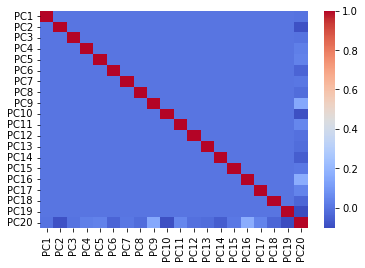

In [38]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

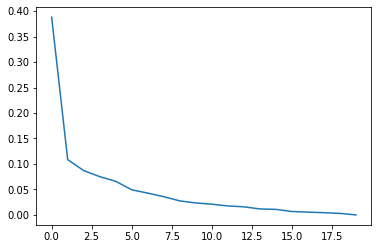

In [39]:
plt.plot(pca.explained_variance_ratio_)

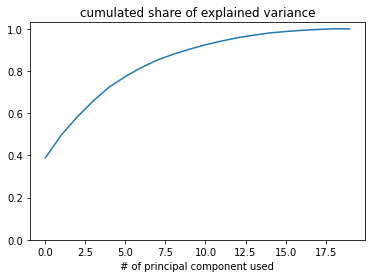

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [42]:
cluster_pca = KMeans(n_clusters=4)
cluster_pca.fit(X_proj.iloc[:,:6])

KMeans(n_clusters=4)

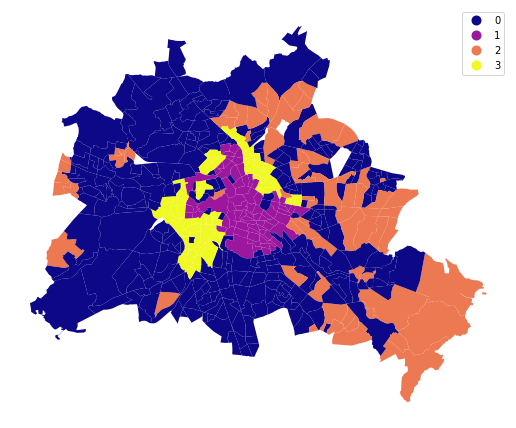

In [43]:
# Assign labels into a column
clustering_df["label"] = cluster_pca.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
clustering_df.plot(
    column="label", categorical=True, legend=True, linewidth=0, ax=ax, cmap='plasma'
)
# Remove axis
ax.set_axis_off()
plt.show()

In [44]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = clustering_df.groupby("label")[infrastructure].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

label,0,1,2,3
public_tra,-0.037,0.727,-0.094,0.064
eating,-0.042,2.222,-0.140,1.442
culture,0.034,2.496,-0.046,0.916
community,-0.106,2.368,-0.181,0.740
health_car,-0.105,0.945,-0.311,1.646
public_ser,-0.201,0.837,-0.275,0.741
education,0.248,1.377,0.257,3.686
outdoor_fa,-0.028,1.187,0.116,0.227
outdoor_le,0.197,0.456,0.270,0.007
night_life,-0.027,2.362,-0.187,1.133


Text(0.5, 0, 'k cluster number')

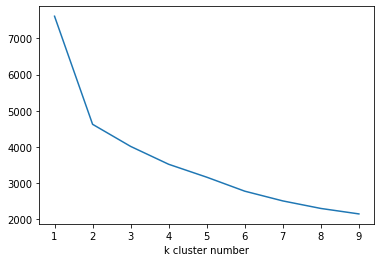

In [41]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_proj.iloc[:,:6])
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')